In [2]:
import tensorflow as tf  # Open-source Python library for ML
from tensorflow.python.client import device_lib # Method that enables to list the devices available in the local process 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1133850420155887956,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3135687886
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14999296658799822768
 physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [3]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Setup

In [4]:
import numpy as np # *fundamental package for scientific computing in Python. Show documentation
from tensorflow import keras
from tensorflow.keras import layers


# Prepare the data

In [5]:
# Model / data parameters
num_classes = 10 # *Show image. MNIST 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images

input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # *Show datasets and MNIST information in Keras 
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 # Pixel normalization rescales the values into a range of [0,1]
x_test = x_test.astype("float32") / 255 # Use a common scale for different features (weights update)

print("x_train shape:", x_train.shape)


# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)# Given a tensor input this operation inserts a dimension of length 1 at the dimension index axis
x_test = np.expand_dims(x_test, -1)# a negative axis counts from the end so axis=-1 adds an inner most dimension #channels



print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

#ADDED to check the format of labels (integers from 0 to 9) before preprocessing (one hot encoding)
print(len(y_train))
print(y_train[2])

# convert class vectors to binary class matrices             library.function
y_train = keras.utils.to_categorical(y_train, num_classes)  # *Show in Keras. Converts a class vector (integers) to binary class matrix.
y_test = keras.utils.to_categorical(y_test, num_classes) # each numerical/categorical value is represented as a binary vector

#ADDED to check the format of labels (integers from 0 to 9) after preprocessing (one hot encoding)
print(len(y_train))
print(y_train[2])



x_train shape: (60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
60000
4
60000
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Added for data and image visualization

<IPython.core.display.Javascript object>


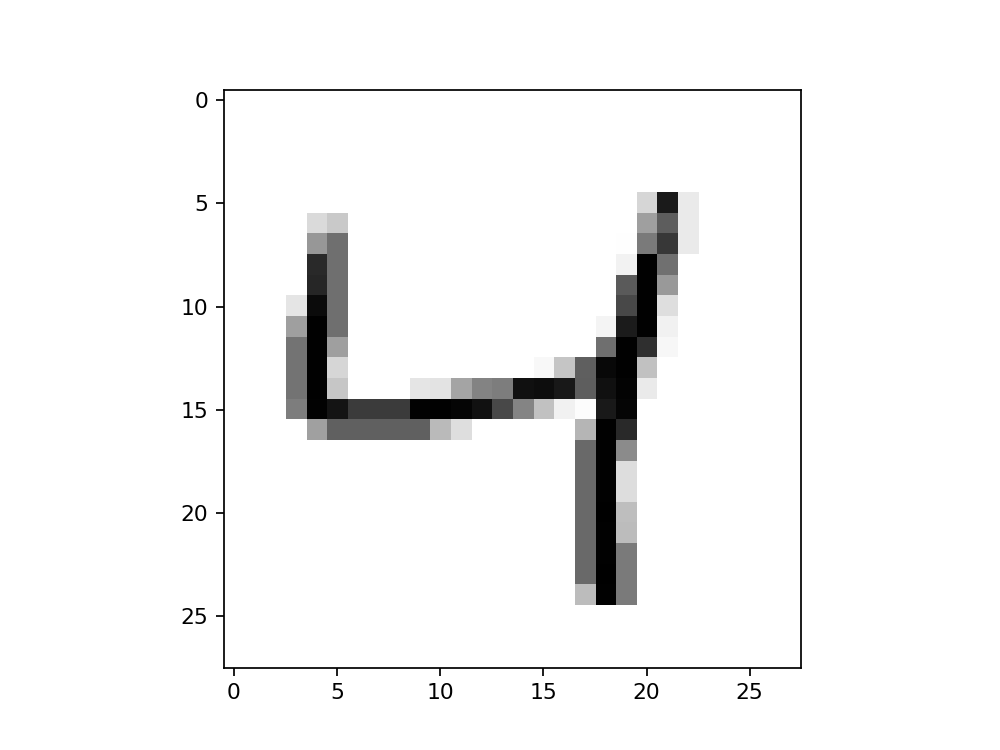

In [6]:

import matplotlib.pyplot as plt # *Show resources. For creating static, animated, and interactive visualizations in Python
#interactive data visualization
%matplotlib notebook 

n=2
plt.imshow(x_train[n,:,:,0], cmap="Greys") #* default colormap 'viridis'. Show cmap="" options


# Build the model

In [7]:
model = keras.Sequential( #each layer has exactly one input tensor and one output tensor * show in Keras vs. Functional
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # * 2D convolution layer. Check arguments, change filters to match picture
        layers.MaxPooling2D(pool_size=(2, 2)), #Downsamples the input along its spatial dimensions. Check arguments
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5), # rate: Float between 0 and 1. Fraction of the input units to drop.
        layers.Dense(num_classes, activation="softmax"),# * recall softma. *Show images
    ]
)

model.summary() # change name layers, analyze parameters

#Parameters
#check 832= 5x5x32+32
#check 51264= 5x5x64x32+64
#check 10250= 1024x10+10

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

# Added for visualization of the architecture

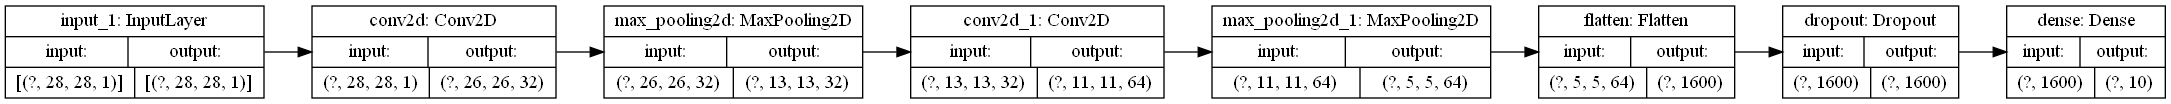

In [8]:
# NOTE: We need to install pydot>  run the next command in Anaconda Prompt
# pip install pydot

# `rankdir='LR'` is to make the graph horizontal. # show saved image in directory
keras.utils.plot_model(model,show_shapes=True,rankdir='LR',to_file="model.png") # check the generated image saved in the folder

In [9]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # a function used to judge the performance of model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1) # Calculates how often predictions equal labels

#Metric functions are similar to loss functions, except that the results from evaluating a metric are not used 
# when training the model but in practice any loss can be used as a metric

#show losses and optimizers in Keras, check categorical crossentropy, val split, batch size


Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 5s 91us/sample - loss: 0.3769 - accuracy: 0.8822 - val_loss: 0.0806 - val_accuracy: 0.9780
Epoch 2/15
54000/54000 [==============================] - 3s 64us/sample - loss: 0.1147 - accuracy: 0.9650 - val_loss: 0.0544 - val_accuracy: 0.9860
Epoch 3/15
54000/54000 [==============================] - 3s 61us/sample - loss: 0.0846 - accuracy: 0.9733 - val_loss: 0.0457 - val_accuracy: 0.9887
Epoch 4/15
54000/54000 [==============================] - 3s 62us/sample - loss: 0.0724 - accuracy: 0.9773 - val_loss: 0.0419 - val_accuracy: 0.9892
Epoch 5/15
54000/54000 [==============================] - 4s 65us/sample - loss: 0.0633 - accuracy: 0.9801 - val_loss: 0.0383 - val_accuracy: 0.9898
Epoch 6/15
54000/54000 [==============================] - 4s 65us/sample - loss: 0.0552 - accuracy: 0.9822 - val_loss: 0.0375 - val_accuracy: 0.9905
Epoch 7/15
54000/54000 [==============================] -

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026762980445762512
Test accuracy: 0.9905


# Added for better understanding

In [31]:
model.save_weights('CMME.h5')# ADDED

In [32]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])# ADDED
model.load_weights('CMME.h5')# ADDED

Predicted:  [4.13984802e-09 1.15197296e-10 5.78759455e-06 2.62509620e-05
 4.04786014e-13 2.53237986e-10 8.66506182e-16 9.99967337e-01
 8.58165876e-08 5.49235779e-07]
Ground-truth:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


<IPython.core.display.Javascript object>


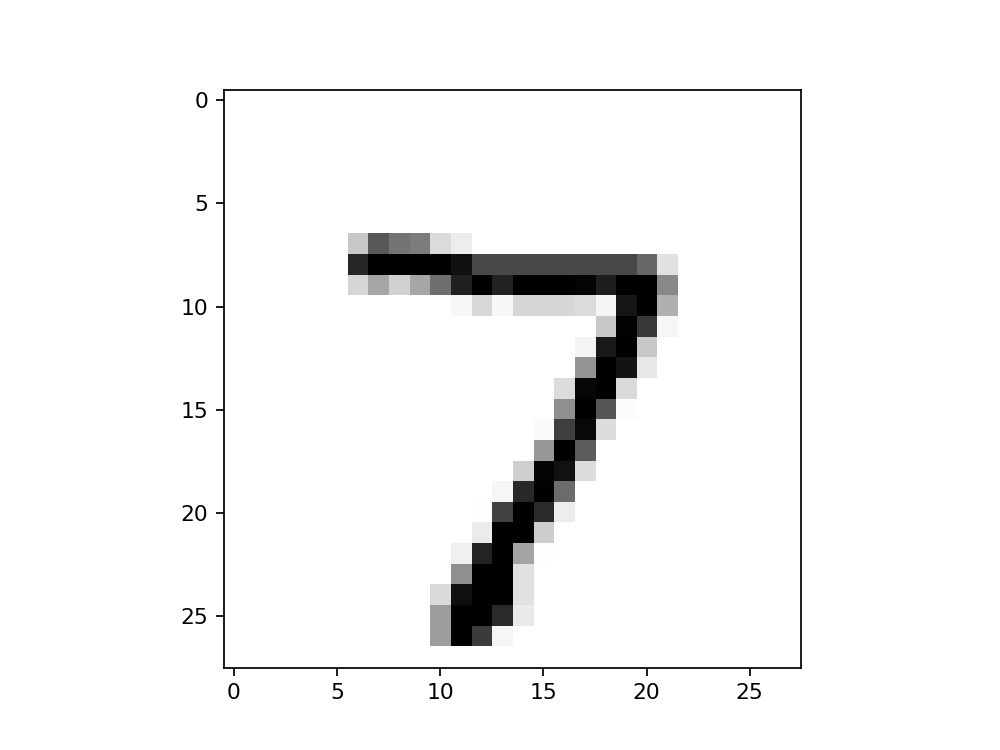

In [28]:
index=0 # index of the image to make a predcition inside the test set.
y_pred=model.predict(x_test)[index]
print("Predicted: ",y_pred)
print("Ground-truth: ",y_test[index])
plt.imshow(x_test[index,:,:,0], cmap="Greys")

In [30]:
#Computation of the loss for a given sample

# Using 'auto'/'sum_over_batch_size' reduction type.
cce = keras.losses.CategoricalCrossentropy()
print("loss(cce) for the single prediction: ",cce(y_test[index], y_pred).numpy())

loss(cce) for the single prediction:  3.266388e-05


In [26]:
model = keras.Sequential( #each layer has exactly one input tensor and one output tensor
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), #2D convolution layer. Check arguments, change name, change filters to match picture
        layers.MaxPooling2D(pool_size=(2, 2)), #Downsamples the input along its spatial dimensions. Check arguments
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),# recall softmax
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [27]:
batch_size = 128
epochs = 15
# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # a function used to judge the performance of model
# Fit the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1) # Calculates how often predictions equal labels


Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 4s 76us/sample - loss: 0.3587 - accuracy: 0.8909 - val_loss: 0.0884 - val_accuracy: 0.9760
Epoch 2/15
54000/54000 [==============================] - 4s 65us/sample - loss: 0.1155 - accuracy: 0.9644 - val_loss: 0.0578 - val_accuracy: 0.9847
Epoch 3/15
54000/54000 [==============================] - 4s 65us/sample - loss: 0.0873 - accuracy: 0.9732 - val_loss: 0.0464 - val_accuracy: 0.9882
Epoch 4/15
54000/54000 [==============================] - 3s 64us/sample - loss: 0.0740 - accuracy: 0.9767 - val_loss: 0.0434 - val_accuracy: 0.9882
Epoch 5/15
54000/54000 [==============================] - 3s 64us/sample - loss: 0.0649 - accuracy: 0.9797 - val_loss: 0.0385 - val_accuracy: 0.9902
Epoch 6/15
54000/54000 [==============================] - 3s 63us/sample - loss: 0.0570 - accuracy: 0.9822 - val_loss: 0.0378 - val_accuracy: 0.9897
Epoch 7/15
54000/54000 [==============================] -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<IPython.core.display.Javascript object>


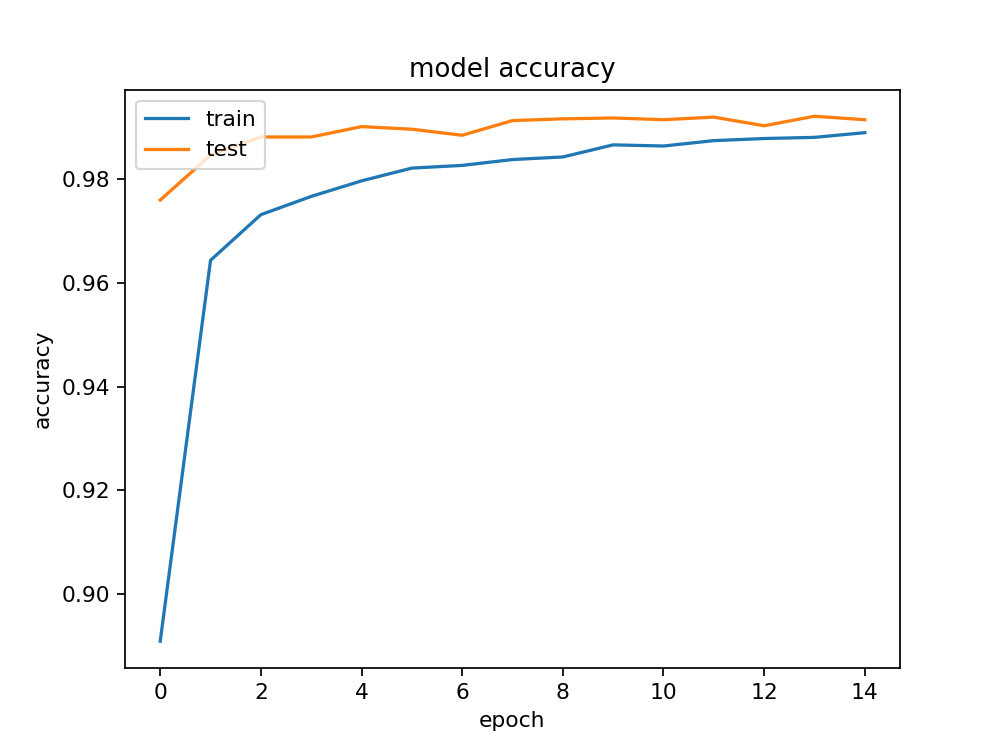

In [33]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


<IPython.core.display.Javascript object>


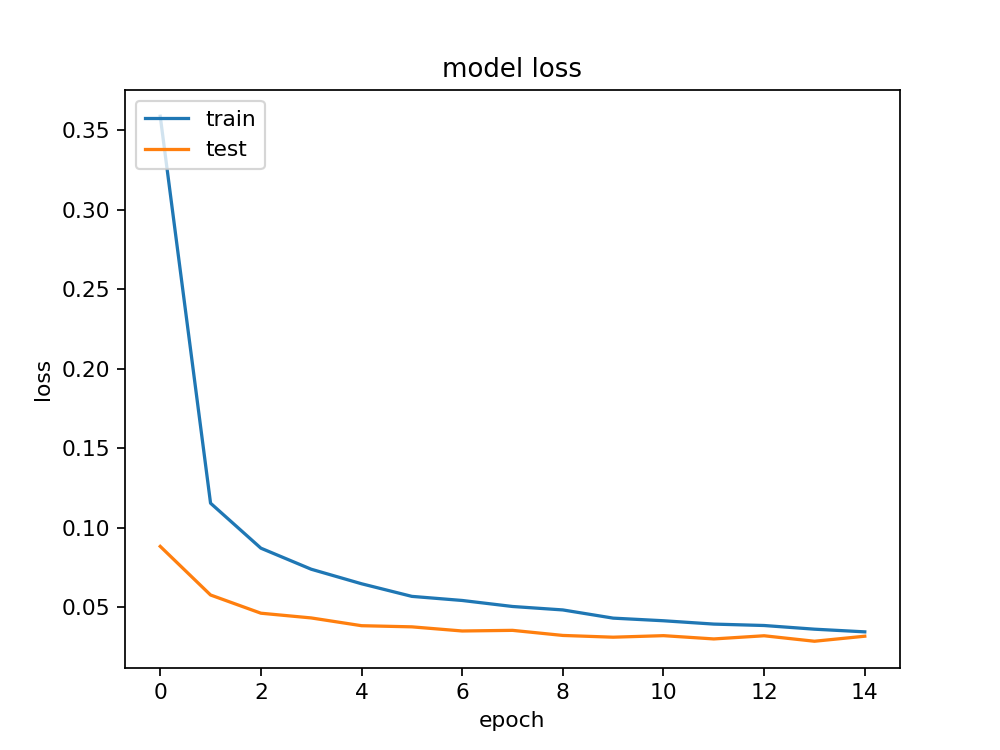

In [34]:
# summarize history for loss
plt.plot(history.history['loss']) #
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Observed Underfitting > increase complexity of network